#### Keras para crear una RNC para clasificar imágenes

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Obtener datos: ya está dividido en conjuntos de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 15s 1us/step


In [3]:
X_train.shape

(60000, 28, 28)

* Escalar datos

Queremos escalar los datos entre 0 y 1, Esta es  una opción recurrente porque mejora la velocidad. 

Ya que los pixeles son valores numéricos entre 0 y 225, podemos dividir por el valor máximo para lograrlo. 

In [4]:
# Escalar datos entre 0 y 1
X_train = X_train / 255
X_test = X_test / 255

* Reformar datos

Ahora necesitamos reformar nuestros datos. Actualmente, cada imagen es de 28 pixeles x 28 pixeles. Ya que cada pixel tiene un valor de color, tenemos que hacer una reforma para que sea 28x28x1. Si tenemos valores RGB (rojo, verde y azul, por sus iniciales en inglés), querremos reformar a 28x28x3.

In [5]:
# Reformar datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#### Formato objetivo

In [6]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [7]:
# Paso 1: Definir nuestra estructura de red
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [8]:

# Modelo secuencial
model = Sequential()

In [9]:
# Capa convolucional
model.add(Conv2D(filters = 8, # Cuantos filtros quieres usar
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # ¿Cuál es la forma de tus características de entrada (definimos esto arriba)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos
                activation = 'softmax')) # ¿Qué función de activación estás usando?

In [10]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [11]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3237 - acc: 0.9115 - val_loss: 0.1777 - val_acc: 0.9493
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1557 - acc: 0.9567 - val_loss: 0.1301 - val_acc: 0.9620
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1164 - acc: 0.9673 - val_loss: 0.1056 - val_acc: 0.9684
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0967 - acc: 0.9725 - val_loss: 0.0915 - val_acc: 0.9723
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0846 - acc: 0.9756 - val_loss: 0.0888 - val_acc: 0.9711
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0754 - acc: 0.9777 - val_loss: 0.0830 - val_acc: 0.9733
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0682 - acc: 0.9796 - val_loss: 0.0786 - val_acc: 0.9752
Epoch 8/20
1875/1875 [==========================

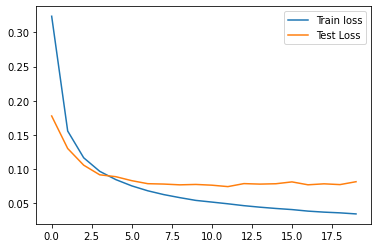

In [12]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

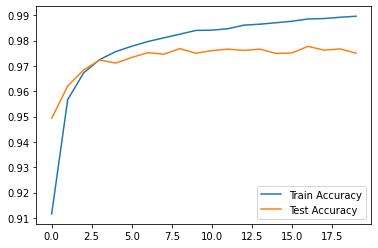

In [13]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();